# АНАЛИЗ ИГРОМИРА

### Цель исследования:

Из открытых источников интернет-магазина «Стримчик» нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Имеем данные до 2016 года. Необходимо представить, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 

### Описание данных:



- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1.  Знакомство с данными

In [4]:
import pandas as pd
import pathlib

In [5]:
#прочитаем из csv-файла данные с описанием 
path_1 = pathlib.Path('C:/') / 'Ya' / 'datas' / 'games.csv'
df = pd.read_csv(path_1)
display(df.head()) # выводим первые 5 строк датафрейма


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Первое, что сразу хочется поправить - это названия столбцов. Чтобы в дальнейшем ими было проще оперировать, уберём из названий столбцов прописные буквы.

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
df = df.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'year_of_release', 'Genre':'genre', 
                        'NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales' , 'Other_sales':'other_sales' ,
                        'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating' })
df.head()
                        

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Ознакомимся с общей информацией по нашим данным

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [9]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Исходя из общей информации можем сделать следующие выводы: 
- в столбцах с информацией о названиях игр и годами их релиза есть незначительное количество отсутствующих значений, строки с этими значениями мы просто удалим из нашего набора данных, так как они составляют несущественных процент наблюдений;
- тип данных в столбце 'year_of_release' лучше привести к типу "int", так как в этом столбце указан год выхода игры;
- чтобы в дальнейшем оперировать параметром об оценке игры пользователем, нам необходимо превести данные в столбце 'user_score' из строкового типа в вещественный (из "object" в "float64");
- благодаря методу describe() можно сделать вывод, что явных выбросов (очень больших либо слишком мальньких) в нашем наборе данных - нет.




### Шаг 2.  Подготовка данных

In [10]:
#удаляем строки с отсутствующими значениями в столбцах "name" и "year_of_release":
df.dropna(subset=['name', 'year_of_release'], inplace=True)

#меняем тип данных в столбце "year_of_release":
df['year_of_release'] = df['year_of_release'].astype('int')

#меняем тип данных в столбце "user_score":
df['user_score'] = pd.to_numeric(df['user_score'], errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.4+ MB


In [11]:
len(df.loc[df['user_score']=='tbd'])

2376

In [12]:
df.loc[df['user_score']=='tbd'].head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


В столбце с оценкой пользователя встречается аббревиатура "tbd". Предположу, что она расшифровывается как "To Be Determined" -  это может означать то, что на момент выгрузки данных, оценка пользователя на эти игры была не определена. Именно эта аббривиатура и мешает нам преобразовать данные столбца "user_score" в вещественный тип.

- принудительно заменим значения "tbd" на NaN с помощью значения "coerce" для аргумента "errors" функции "to_numeric";
- все отсутствующие значения столбца "user_score" заменяем на среднее;
- все отсутствующие значения столбца "critic_score" также заменяем на среднее;

In [13]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.loc[df['user_score'].isna(), 'user_score'] = df['user_score'].mean()
df.loc[df['critic_score'].isna(), 'critic_score'] = df['critic_score'].mean()

<div class="alert alert-info"> <b>Комментарий студента:</b> Оценки пользователей не выходят из диапазона от 0 до 10, а критиков - от 0 до 100, т.е. в этих данных нет выбивающихся значений которые могли бы сдвинуть среднее. Именно поэтому я считаю , что замена отсутствующих значений на средние в этих столбцах корректна.  </div>

In [14]:
df.isna().sum() #проверим количество отсутствующих значений после преобразований

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Посчитаем суммарные продажи во всех регионах. Создадим для этих значений отдельный столбец:

In [15]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.00000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.994363,7.12633,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.30000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.00000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.994363,7.12633,NaN,31.38


In [16]:
df.loc[df['rating'].isna(), 'rating'] = 'undefined'

In [17]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

### Шаг 3. Исследовательский анализ данных 

**Выясним сколько игр выпускалось в разные годы и важны ли данные за все периоды.**           

Для этого проведём следующие операции:
- создадим сводную таблицу по годам выпуска;
- на основании получившейся сводной таблицы построим график который наглядно покажет изменения количества выпускаемых игр во времени.

Text(0, 0.5, 'количество')

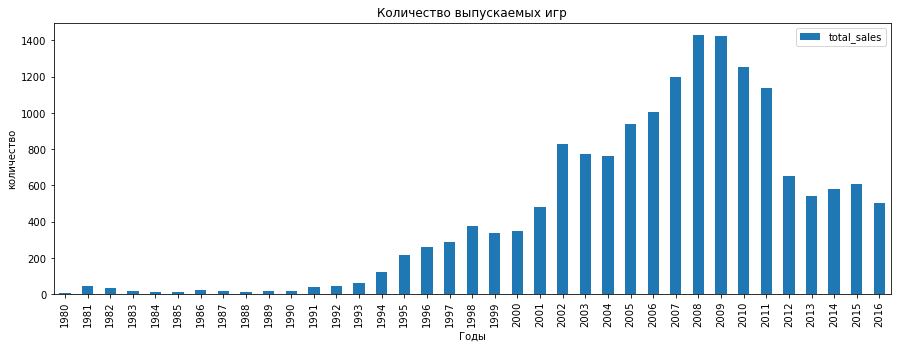

In [18]:
import matplotlib.pyplot as plt
(
    df.pivot_table(index='year_of_release', values=['total_sales'], aggfunc='count')
    .plot(kind='bar', linewidth=2, figsize=(15, 5))
)
plt.title('Количество выпускаемых игр')
plt.xlabel('Годы')
plt.ylabel('количество')

**Вывод:**
- Из получившейся столбчатой диаграммы чётко видно, что до 1995 года ежегодно выпускалось не более 100 игр, а далее пошло резкое увеличение количества создаваемых игр; 
- Исходя из этого можно заключить, что  для прогнозирования кампаний на 2017 год, не следует брать данные старше 1995 года - времена были другие и рынок видеоигр тотально отличался.

**Выясним как менялись продажи по платформам и за какой характерный срок появляются новые и исчезают старые платформы. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.** 

Рассмотрим игровые платформы для которых суммарная продажа игр превышала 300 млн. проданных копий за всё время, для этого:
- создадим переменную со списком популярных игровых платформ;
- на основвании сводной таблицы по срезу из исходных данных построим график распределения продаж во времени для самых популярных игровых платформ.

Text(0, 0.5, 'млн.шт.')

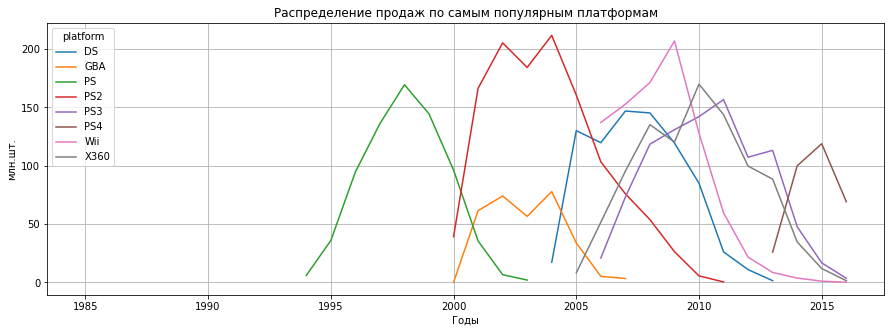

In [19]:
top_platforms = (df.pivot_table(index=['platform'], values='total_sales', aggfunc='sum')
                 .sort_values(by='total_sales', ascending=False))

top_platforms = top_platforms.query('total_sales > 300').reset_index()
top_platforms = top_platforms['platform'].tolist()


(
     df.query('platform in @top_platforms')
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(15, 5))
)
plt.title('Распределение продаж по самым популярным платформам')
plt.xlabel('Годы')
plt.ylabel('млн.шт.')

In [20]:
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA']

Выясним за какой характерный срок появляются новые и исчезают старые платформы. Для этого:
- возьмём для рассмотрения платформы с минимальными значимыми продажами, пусть это число будет больше 5 млн. проданных копий;
- найдём среднее "врямя жизни" для выбранных платформ.

In [21]:
min_sales = 5 #задаём минимальное значение проданных копий
platform_lifetime = df.groupby(['platform', 'year_of_release']).agg({'total_sales' : 'sum'})

platform_lifetime

total_sales
platform year_of_release             
2600     1980                   11.38
         1981                   35.68
         1982                   28.88
         1983                    5.84
         1984                    0.27
...                               ...
XB       2008                    0.18
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

[238 rows x 1 columns]

In [22]:
platform_lifetime.query('total_sales > @min_sales')
platform_lifetime.reset_index().groupby('platform').agg({'year_of_release' : 'nunique'}).mean()
#функция nunique считает общее количество унакальных значений в заданном столбце 

year_of_release    7.677419
dtype: float64

**Вывод:**
- Платформами с наибольшими суммарными продажами оказались: 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA';
- Характерное "время жизни" игровой платформы: 7 лет и 8 месяцев.

**Чтобы детально увидеть тренды и тенденции каждой платформы визуализируем распределение более детально:**

Text(0, 0.5, 'млн.шт.')

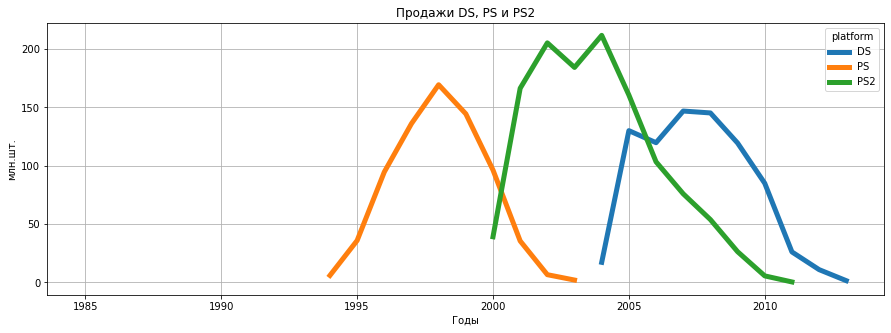

In [23]:
(
     df.query('platform == ["PS2", "DS", "PS" ]')
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(15, 5), linewidth=5)
)
plt.title('Продажи DS, PS и PS2')
plt.xlabel('Годы')
plt.ylabel('млн.шт.')

Text(0, 0.5, 'млн.шт.')

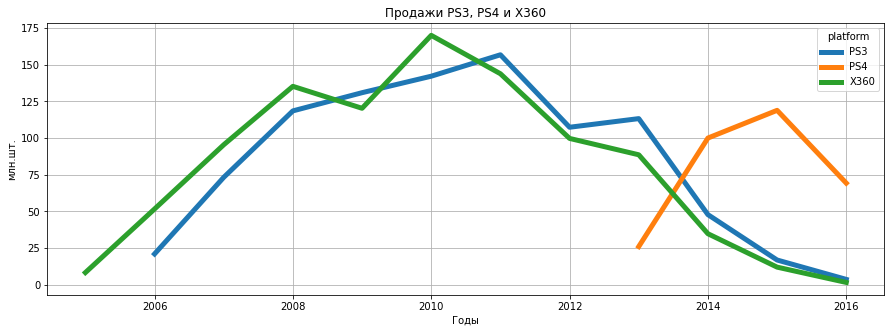

In [24]:
# 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA';
(
     df.query('platform == ["PS4", "X360", "PS3"]')
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(15, 5), linewidth=5)
)
plt.title('Продажи PS3, PS4 и X360')
plt.xlabel('Годы')
plt.ylabel('млн.шт.')

Text(0, 0.5, 'млн.шт.')

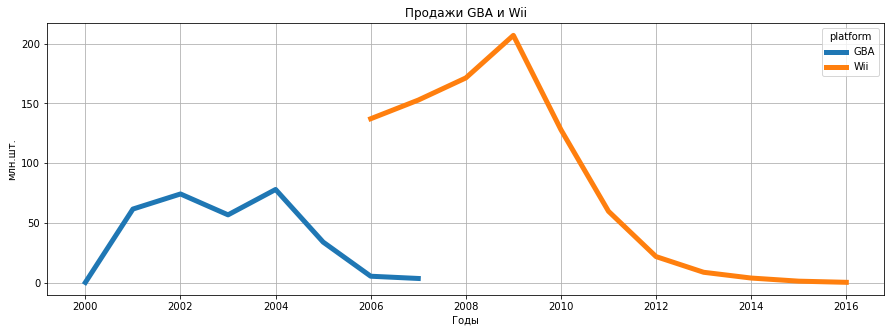

In [25]:
# 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA';
(
     df.query('platform == ["GBA", "Wii"]')
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(15, 5), linewidth=5)
)
plt.title('Продажи GBA и Wii')
plt.xlabel('Годы')
plt.ylabel('млн.шт.')

**Возьмём данные за соответствующий актуальный период.**

Исходя из среднего времени жизни игровой платформы, становится понятно, что для составления прогнозов на 2017 год, нет смысла брать данные старше 2009 (2017 - 8 лет).


**В дальнейшем исследовании не учитываем данные за предыдущие годы.**

Для этого создадим таблицу с актуальными данными с помощью среза

In [26]:
actual_df = df.query('year_of_release >= 2013')

**Выясним платформы лидирующие по продажам и выберем несколько потенциально прибыльных.**

Text(0.5, 1.0, 'Объём продаж среди актуальных игровых платформ')

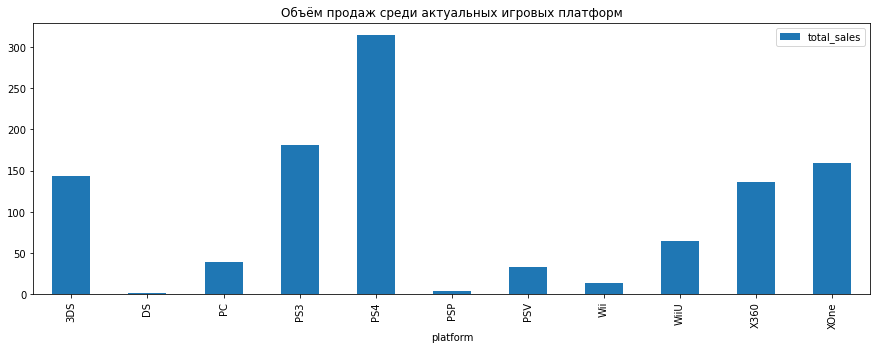

In [27]:
actual_df.groupby('platform').agg({'total_sales':'sum'}).plot(kind = 'bar', figsize=(15,5))
plt.title('Объём продаж среди актуальных игровых платформ')

Из столбчатой диаграммы видно, что по продажам явно лидируют PS4, PS3, XOne, 3DS, X360 и WiiU.

Теперь необходимо проверить их потенциал. Для этого построим графики изменения количества продаж во времени для каждой из этих платформ:

Text(0, 0.5, 'продажи')

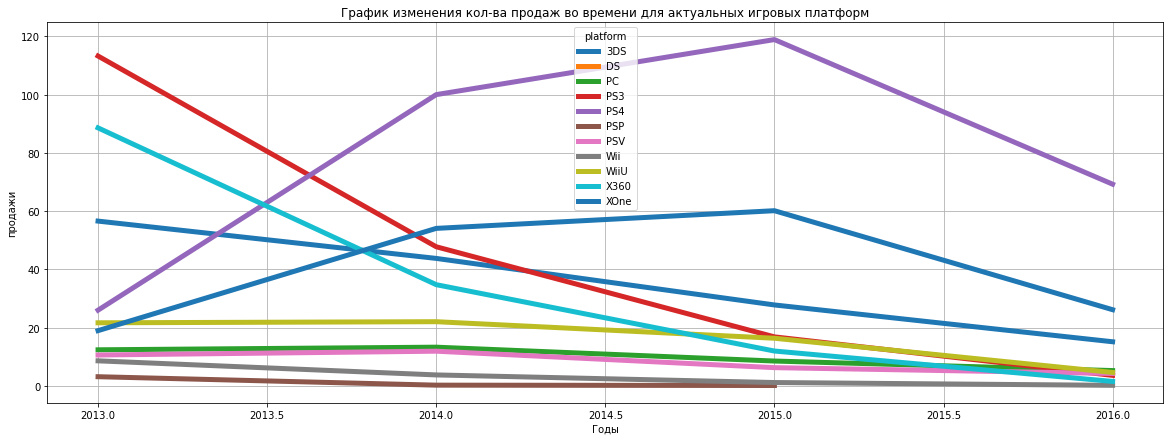

In [28]:
(
     actual_df
    .pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
    .plot(grid=True, figsize=(20, 7), linewidth=5)
)
plt.title('График изменения кол-ва продаж во времени для актуальных игровых платформ')
plt.xlabel('Годы')
plt.ylabel('продажи')

**Вывод:**
- Из лидеров по количеству продаж стоит выделить PS4 , так как на 2016 год уровень продаж игр для этой платформы находится на самом высоком уровне, похожее поведение у количества продаж на платформу XOne, но у неё общее количество продаж значительно ниже PS4;
- У 3DS ещё есть возможный потенциал на увеличение продаж;
- Также не стоит списывать со счетов относительно молодую игровую платформу WiiU c возможным потенциалом роста продаж; 
- X360 находится на самом завершении своей популярности.


**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. **

Text(0.5, 0, 'название платформы')

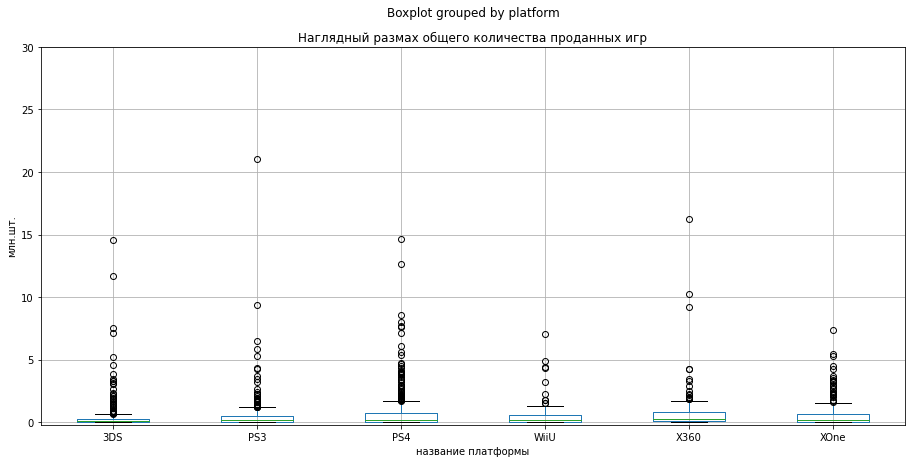

In [29]:
import warnings
warnings.filterwarnings('ignore')
top_platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU']
 #df.query('platform in @top_platforms')
    #.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
   # .plot(grid=True, figsize=(15, 5))
    
actual_df.query('platform in @top_platforms').boxplot(column='total_sales', by='platform', figsize=(15,7))
plt.ylim(-0.2, 30)
plt.title('Наглядный размах общего количества проданных игр')
plt.ylabel('млн.шт.')
plt.xlabel('название платформы')

Проверим сильно выделяющиеся значения очень похожие на ошибочные выбросы:

In [30]:
actual_df.loc[actual_df['platform'] == 'PS4'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.994363,7.12633,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.30000,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.000000,4.30000,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,68.994363,7.12633,undefined,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.000000,5.70000,M,7.66


In [31]:
actual_df.loc[actual_df['platform'] == 'PS3'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.20000,M,21.05
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.000000,2.60000,M,9.36
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.000000,4.30000,E,6.46
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.000000,9.10000,M,5.86
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,68.994363,7.12633,undefined,5.27


In [32]:
actual_df.loc[actual_df['platform'] == 'X360'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.10000,M,16.27
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.000000,2.60000,M,10.24
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,68.994363,7.12633,undefined,9.18
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,68.994363,4.90000,M,4.28
271,FIFA 14,X360,2013,Sports,0.92,2.89,0.01,0.40,84.000000,4.20000,E,4.22


In [33]:
actual_df.loc[actual_df['platform'] == '3DS'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,68.994363,7.12633,undefined,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,68.994363,7.12633,undefined,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,68.994363,7.12633,undefined,7.55
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,68.994363,7.12633,undefined,7.14
184,Tomodachi Life,3DS,2013,Simulation,0.97,2.11,1.90,0.24,68.994363,7.12633,undefined,5.22


Для более детального анализа диаграммы размаха, изменим её масштаб:

Text(0.5, 0, 'название платформы')

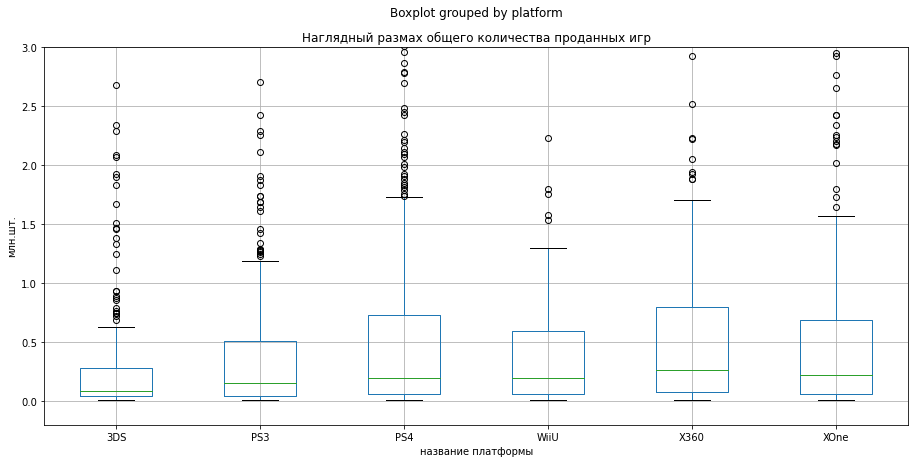

In [34]:
actual_df.query('platform in @top_platforms').boxplot(column='total_sales', by='platform', figsize=(15,7))
plt.ylim(-0.2, 3)
plt.title('Наглядный размах общего количества проданных игр')
plt.ylabel('млн.шт.')
plt.xlabel('название платформы')

**Вывод:**
- Выделяющиеся значения на первой диаграмме - это не выбросы, а действительно супер популярные видеоигры, такие как: GTA, COD, Марио;
- Нормальные значения общего количества продаж у самых популярных игровых платформ (PS3, PS4, X360, XOne) не превышает 1,75 млн. проданных копий;
- Границы межквартильного размаха у этих платформ находятся в пределах от 0,1 до 0,8 млн. проданных копий (это значит, что большинство данных из этой выборке находятся именно в этом диапазоне);
- Судя по анализу диаграмм размаха, в мире видеоигр довольно часто происходит "выстреливание" определённых игр по продажам. 

**Изучим влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.**

Посмотрим как отзывы влияют на количество продаж для игр на платформе PS4:

Сначала разберём отзывы критиков.

Text(0, 0.5, 'оценка критиков')

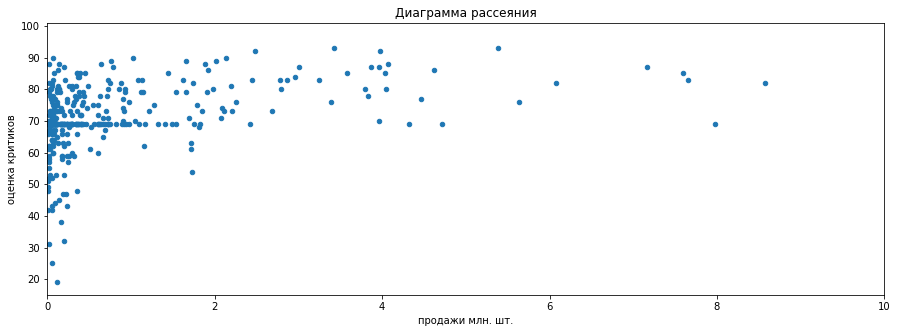

In [35]:
report = actual_df.loc[actual_df['platform'] == 'PS4']
report.plot(x='total_sales', y='critic_score', kind='scatter', figsize=(15,5))
plt.xlim(0, 10)
plt.title('Диаграмма рассеяния')
plt.xlabel('продажи млн. шт.')
plt.ylabel('оценка критиков')

Очевидно, что не все игры с высоким рейтингом критиков набирают большие продажи. Однако, не наблюдается ни одной игры с низким рейтингом от критиков , но с большими показателями по продажам.

Теперь изучим влияние отзывов пользователей на показатели продаж:

Text(0, 0.5, 'оценка критиков')

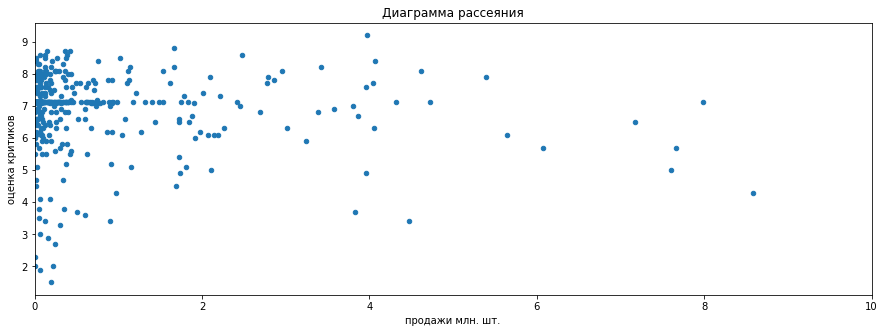

In [36]:
report.plot(x='total_sales', y='user_score', kind='scatter', figsize=(15,5))
plt.xlim(0, 10)
plt.title('Диаграмма рассеяния')
plt.xlabel('продажи млн. шт.')
plt.ylabel('оценка критиков')

На этой диаграмме встречаются такие игры, у которых высокие показатели по продажам, но при этом рейтинг пользователя довольно низкий. Посмотрим, что это за игры:

In [37]:
report.query('total_sales > 3 and user_score < 5')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47
304,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96
323,Call of Duty: Ghosts,PS4,2013,Shooter,1.78,1.43,0.05,0.57,78.0,3.7,M,3.83


Для наглядности масштабируем и преобразуем эти две диаграммы 

Text(0, 0.5, 'оценка критиков')

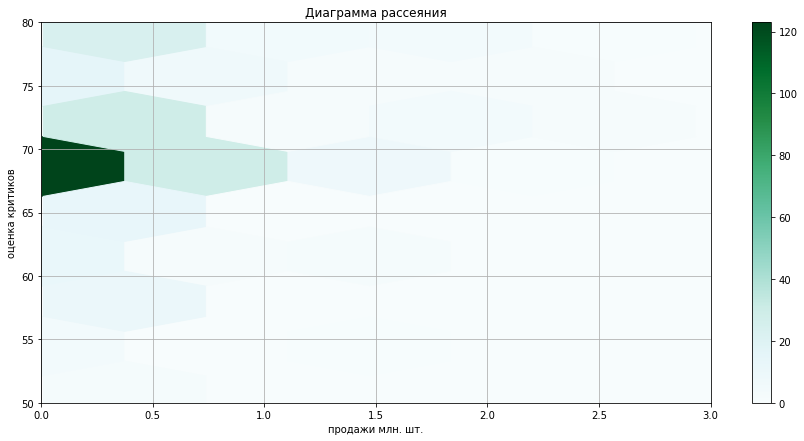

In [38]:
report.plot(x='total_sales', y='critic_score', kind='hexbin', gridsize=20, sharex=False,  grid=True, figsize=(15,7))
plt.xlim(0, 3)
plt.ylim(50, 80)
plt.title('Диаграмма рассеяния')
plt.xlabel('продажи млн. шт.')
plt.ylabel('оценка критиков')

Text(0, 0.5, 'оценка пользователей')

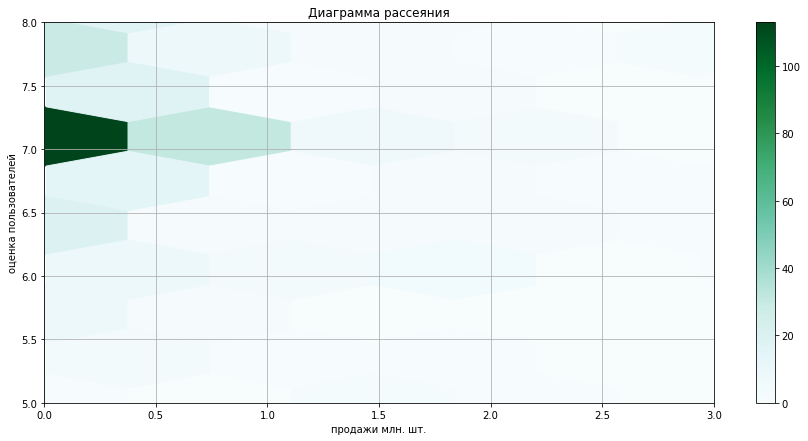

In [39]:
report.plot(x='total_sales', y='user_score', kind='hexbin', gridsize=20, sharex=False,  grid=True, figsize=(15,7))
plt.xlim(0, 3)
plt.ylim(5, 8)
plt.title('Диаграмма рассеяния')
plt.xlabel('продажи млн. шт.')
plt.ylabel('оценка пользователей')

Рассчитаем коэффициент корреляции Пирсона между количеством продаж и оценками критиков:


In [40]:
corr_crit = report['total_sales'].corr(report['critic_score'])
corr_user = report['total_sales'].corr(report['user_score'])
print('к-т Пирсона между продажами и оценками критиков равен:',corr_crit )
print('к-т Пирсона между продажами и оценками пользователей равен:', corr_user )

к-т Пирсона между продажами и оценками критиков равен: 0.3488963883620059
к-т Пирсона между продажами и оценками пользователей равен: -0.04545391610787779


**Вывод:**

- корреляция между количеством продаж и оценкой критиков равна 0,35 - это значит, что между этими двумя показателями существует незначительная прямая взаимосвязь (чем выше оценка критиков, тем больше продаж);
- корреляция между количеством продаж и оценкой пользователей равна: -0,04 - это значит, что между этими двумя величиниами практически полностью отсутствует взаимосвязь, так как коэффициент корреляции близок к 0.

**Соотнесём выводы с продажами игр на других платформах.**

- из диаграммы размаха видно, что у каждой из рассматриваемых платформ есть свои популярные игры, для которых общее количество продаж на диаграмме больше похоже на выбросы, чем на реальные данные;
- если основное большинство данных об общем количестве продаж среди популярных платформ имеет показатель от 0,1 до 0,8 млн. проданных копиий, то для остальных платформ это число колеблется от 0,1 до 0,4.

**Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

Text(0, 0.5, 'Кол-во продаж')

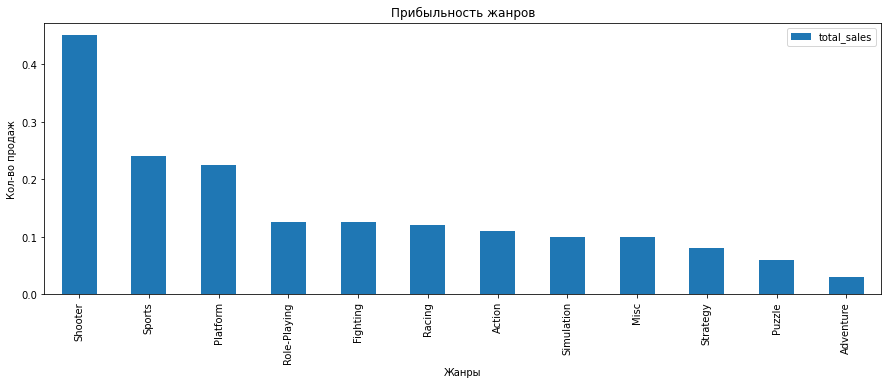

In [41]:
(
    actual_df.groupby('genre').agg({'total_sales':'median'})
    .sort_values(by='total_sales', ascending=False)
    .plot(kind = 'bar', figsize = (15,5))
)
plt.title('Прибыльность жанров')
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')

**Вывод:**
- самый прибыльные и разко выделяющийся из общего распределения продаж жанр - это Shooter. Он практически в 1,5 раза операжает следуемые за ним жанры Sports и Platform;
- самые прибыльные жанры подразумевают активную и захватывающую игру пользователя. К таким относятся:Shooter, Sports и Platform;
- самые низкие продажи у Adventure и пазлов;
- исходя из этого можно убедиться, что игровая индустрия - это способ отвлечься и расслабить мозг  , именно поэтому жанры игр в которых не обойтись без умственных усилий кораздо менее популярны, соответственно и прибыли они приносят меньше всех остальных.

### Шаг 4. Составим портрет пользователя каждого региона

**Портрет американского пользователя**

Выявим ТОП-5 популярных платформ

Text(0.5, 1.0, 'Рейтинг игровых платформ в Америке')

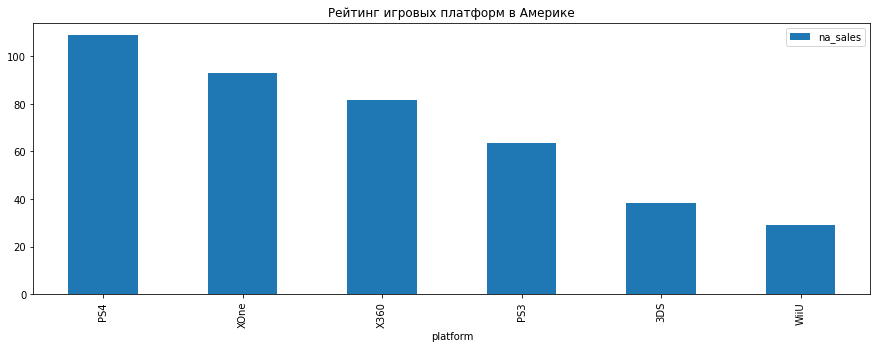

In [42]:
actual_df = actual_df.query('platform in @top_platforms')
(
actual_df.groupby('platform').agg({'na_sales':'sum'})
.sort_values(by='na_sales', ascending=False)
.plot(kind='bar', figsize=(15,5))
)
plt.title('Рейтинг игровых платформ в Америке')


Добавим диаграмму размаха:

Text(0.5, 0, 'название платформы')

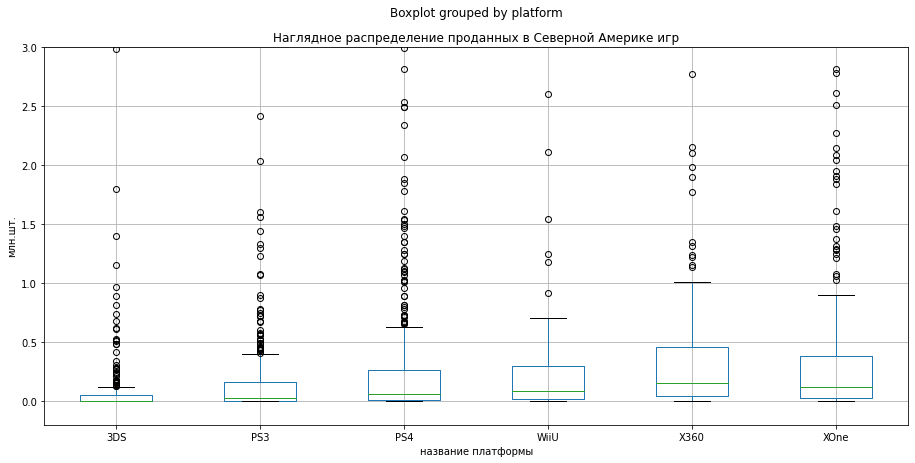

In [43]:
actual_df.boxplot(column='na_sales', by='platform', figsize=(15,7))
plt.ylim(-0.2, 3)
plt.title('Наглядное распределение проданных в Северной Америке игр')
plt.ylabel('млн.шт.')
plt.xlabel('название платформы')

Рассчитаем доли продаж для топ-5 популярных платформ в Америке:

In [44]:
part_ps4 = actual_df.loc[actual_df['platform'] == 'PS4', 'na_sales'].sum() / actual_df['na_sales'].sum()
part_xone = actual_df.loc[actual_df['platform'] == 'XOne', 'na_sales'].sum() / actual_df['na_sales'].sum()
part_x360 = actual_df.loc[actual_df['platform'] == 'X360', 'na_sales'].sum() / actual_df['na_sales'].sum()
part_ps3 = actual_df.loc[actual_df['platform'] == 'PS3', 'na_sales'].sum() / actual_df['na_sales'].sum()
part_3ds = actual_df.loc[actual_df['platform'] == '3DS', 'na_sales'].sum() / actual_df['na_sales'].sum()


print('Доля продаж для платформы PS4 равна: {:.2%}'.format(part_ps4))
print('Доля продаж для платформы ХOne равна: {:.2%}'.format(part_xone))
print('Доля продаж для платформы X360 равна: {:.2%}'.format(part_x360))
print('Доля продаж для платформы PS3 равна: {:.2%}'.format(part_ps3))
print('Доля продаж для платформы 3DS равна: {:.2%}'.format(part_3ds))


Доля продаж для платформы PS4 равна: 26.24%
Доля продаж для платформы ХOne равна: 22.47%
Доля продаж для платформы X360 равна: 19.70%
Доля продаж для платформы PS3 равна: 15.32%
Доля продаж для платформы 3DS равна: 9.22%


Выясним какие жанры игр популярны в Америке:

Text(0, 0.5, 'Кол-во продаж')

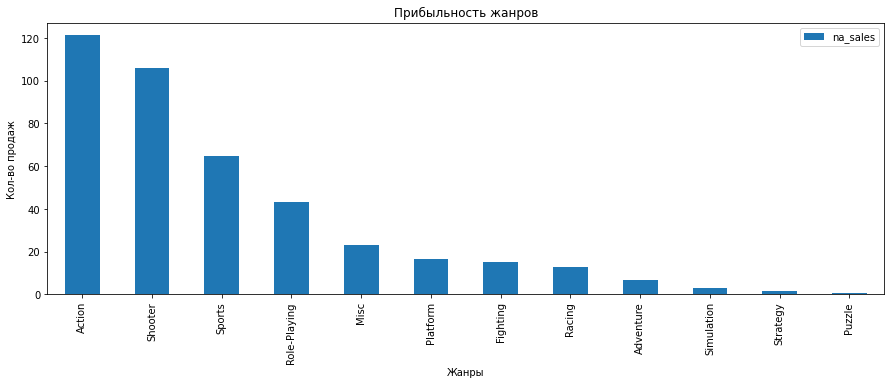

In [45]:
(
    actual_df.groupby('genre').agg({'na_sales':'sum'})
    .sort_values(by='na_sales', ascending=False)
    .plot(kind = 'bar', figsize = (15,5))
)
plt.title('Прибыльность жанров')
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')

Как влияет рейтинг игр на продажи в Америке:

Text(0, 0.5, 'Кол-во продаж')

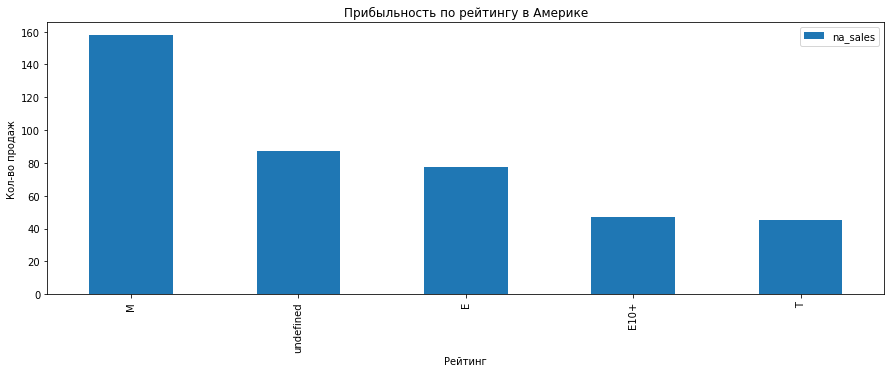

In [46]:
(
    actual_df.groupby('rating').agg({'na_sales':'sum'})
    .sort_values(by='na_sales', ascending=False)
    .plot(kind = 'bar', figsize = (15,5))
)
plt.title('Прибыльность по рейтингу в Америке')
plt.xlabel('Рейтинг')
plt.ylabel('Кол-во продаж')

**Портрет европейского пользователя:**

Выявим ТОП-5 популярных платформ

Text(0.5, 1.0, 'Рейтинг игровых платформ в Европе')

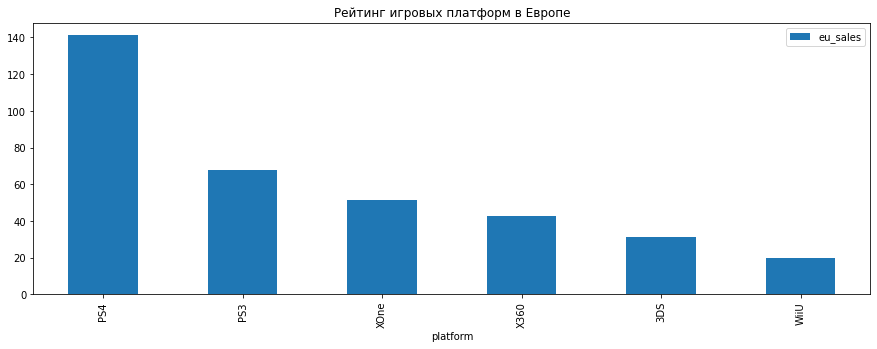

In [47]:
(
actual_df.groupby('platform').agg({'eu_sales':'sum'})
.sort_values(by='eu_sales', ascending=False)
.plot(kind='bar', figsize=(15,5))
)
plt.title('Рейтинг игровых платформ в Европе')

Добавим диаграмму размаха

Text(0.5, 0, 'название платформы')

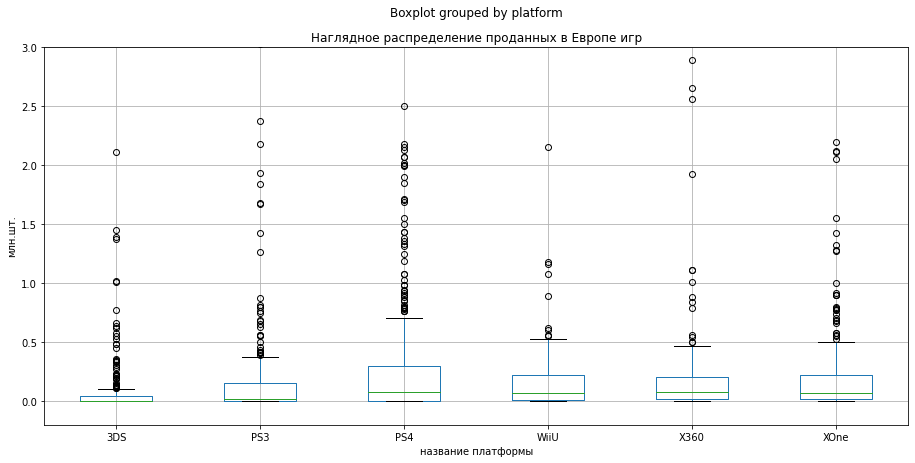

In [48]:
actual_df.boxplot(column='eu_sales', by='platform', figsize=(15,7))
plt.ylim(-0.2, 3)
plt.title('Наглядное распределение проданных в Европе игр')
plt.ylabel('млн.шт.')
plt.xlabel('название платформы')

Рассчитаем доли продаж для каждой из топ-5 популярных платформ в Европе

In [49]:
part_ps4 = actual_df.loc[actual_df['platform'] == 'PS4', 'eu_sales'].sum() / actual_df['eu_sales'].sum()
part_ps3 = actual_df.loc[actual_df['platform'] == 'PS3', 'eu_sales'].sum() / actual_df['eu_sales'].sum()
part_xone = actual_df.loc[actual_df['platform'] == 'XOne', 'eu_sales'].sum() / actual_df['eu_sales'].sum()
part_x360 = actual_df.loc[actual_df['platform'] == 'X360', 'eu_sales'].sum() / actual_df['eu_sales'].sum()
part_3ds = actual_df.loc[actual_df['platform'] == '3DS', 'eu_sales'].sum() / actual_df['eu_sales'].sum()


print('Доля продаж для платформы PS4 равна: {:.2%}'.format(part_ps4))
print('Доля продаж для платформы PS3 равна: {:.2%}'.format(part_ps3))
print('Доля продаж для платформы ХOne равна: {:.2%}'.format(part_xone))
print('Доля продаж для платформы X360 равна: {:.2%}'.format(part_x360))
print('Доля продаж для платформы DS равна: {:.2%}'.format(part_3ds))

Доля продаж для платформы PS4 равна: 39.88%
Доля продаж для платформы PS3 равна: 19.17%
Доля продаж для платформы ХOne равна: 14.58%
Доля продаж для платформы X360 равна: 12.02%
Доля продаж для платформы DS равна: 8.75%


Выясним какие жанры игр популярны в Европе:

Text(0, 0.5, 'Кол-во продаж')

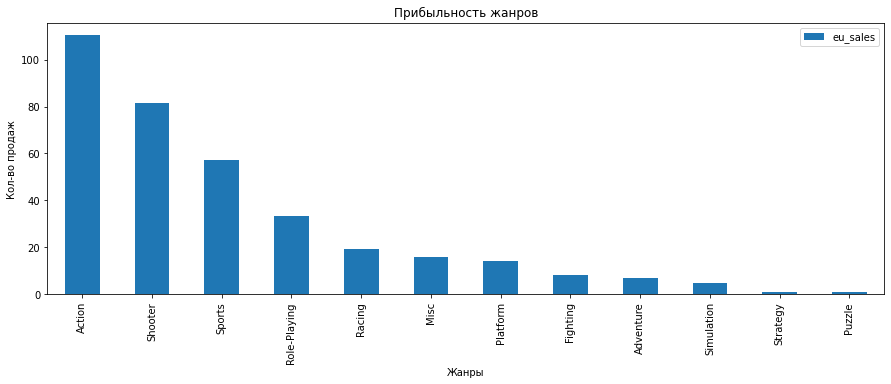

In [50]:
(
    actual_df.groupby('genre').agg({'eu_sales':'sum'})
    .sort_values(by='eu_sales', ascending=False)
    .plot(kind = 'bar', figsize = (15,5))
)
plt.title('Прибыльность жанров')
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')

Как влияет рейтинг игр на продажи в Европе:

Text(0, 0.5, 'Кол-во продаж')

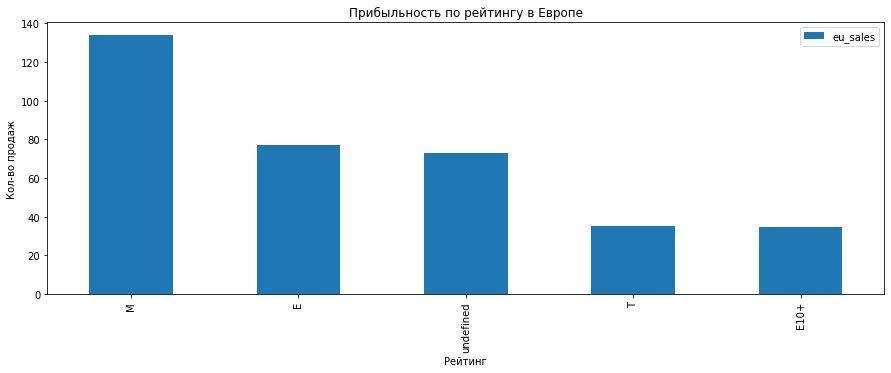

In [51]:
(
    actual_df.groupby('rating').agg({'eu_sales':'sum'})
    .sort_values(by='eu_sales', ascending=False)
    .plot(kind = 'bar', figsize = (15,5))
)
plt.title('Прибыльность по рейтингу в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Кол-во продаж')

**Портрет японского пользователя:**

Выявим топ-5 популярных платформ

Text(0.5, 1.0, 'Рейтинг игровых платформ в Японии')

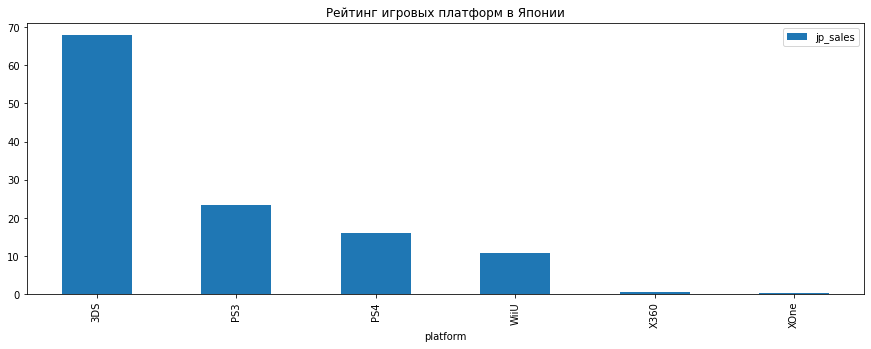

In [52]:
(
actual_df.groupby('platform').agg({'jp_sales':'sum'})
.sort_values(by='jp_sales', ascending=False)
.plot(kind='bar', figsize=(15,5))
)
plt.title('Рейтинг игровых платформ в Японии')

Добавим диаграмму размаха:

Text(0.5, 0, 'название платформы')

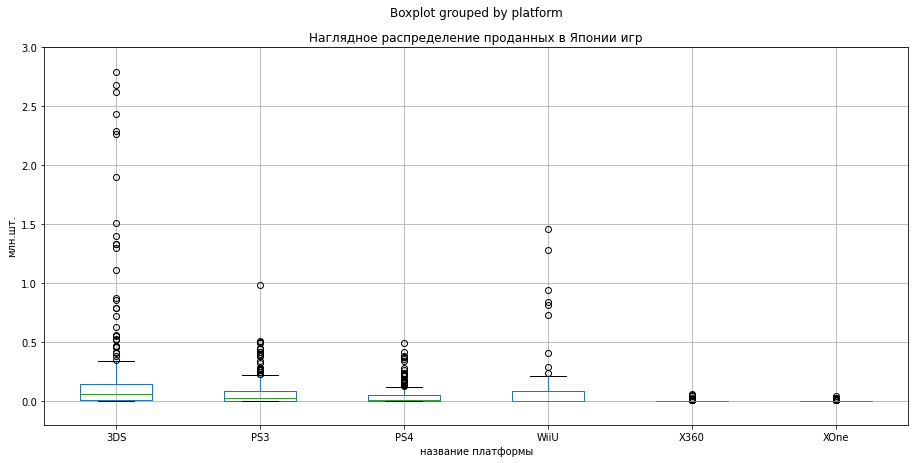

In [53]:
actual_df.boxplot(column='jp_sales', by='platform', figsize=(15,7))
plt.ylim(-0.2, 3)
plt.title('Наглядное распределение проданных в Японии игр')
plt.ylabel('млн.шт.')
plt.xlabel('название платформы')

Рассчитаем доли продаж для каждой из топ-5 популярных платформ в Японии

In [54]:
part_3ds = actual_df.loc[actual_df['platform'] == '3DS', 'jp_sales'].sum() / actual_df['jp_sales'].sum()
part_ps3 = actual_df.loc[actual_df['platform'] == 'PS3', 'jp_sales'].sum() / actual_df['jp_sales'].sum()
part_ps4 = actual_df.loc[actual_df['platform'] == 'PS4', 'jp_sales'].sum() / actual_df['jp_sales'].sum()
part_wiiu = actual_df.loc[actual_df['platform'] == 'WiiU', 'jp_sales'].sum() / actual_df['jp_sales'].sum()

part_x360 = actual_df.loc[actual_df['platform'] == 'X360', 'jp_sales'].sum() / actual_df['jp_sales'].sum()


print('Доля продаж для платформы 3DS равна: {:.2%}'.format(part_3ds))
print('Доля продаж для платформы PS3 равна: {:.2%}'.format(part_ps3))
print('Доля продаж для платформы PS4 равна: {:.2%}'.format(part_ps4))
print('Доля продаж для платформы WiiU равна: {:.2%}'.format(part_wiiu))
print('Доля продаж для платформы X360 равна: {:.2%}'.format(part_x360))


Доля продаж для платформы 3DS равна: 57.06%
Доля продаж для платформы PS3 равна: 19.65%
Доля продаж для платформы PS4 равна: 13.43%
Доля продаж для платформы WiiU равна: 9.15%
Доля продаж для платформы X360 равна: 0.43%


Выясним какие жанры игр популярны в Японии:

Text(0, 0.5, 'Кол-во продаж')

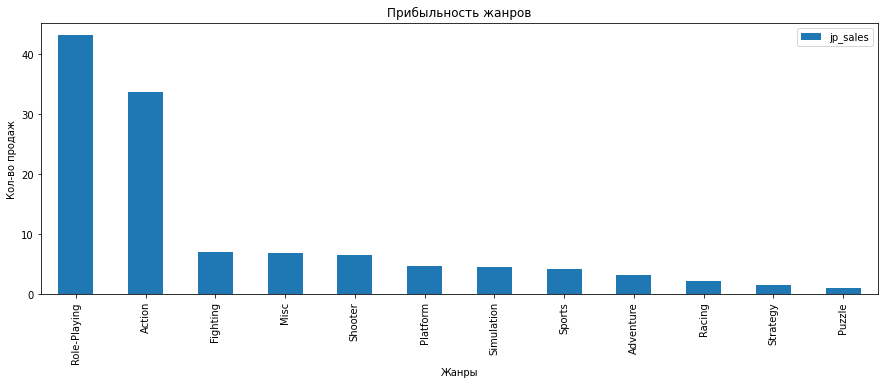

In [55]:
(
    actual_df.groupby('genre').agg({'jp_sales':'sum'})
    .sort_values(by='jp_sales', ascending=False)
    .plot(kind = 'bar', figsize = (15,5))
)
plt.title('Прибыльность жанров')
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')

Как влияет рейтинг игр на продажи в Японии

Text(0, 0.5, 'Кол-во продаж')

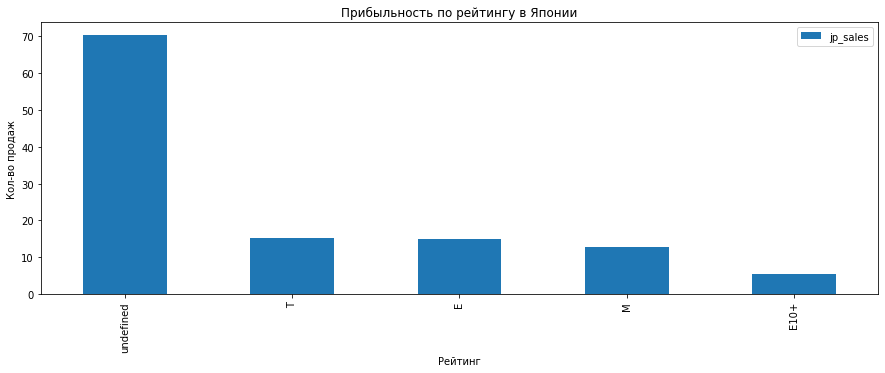

In [56]:
(
    actual_df.groupby('rating').agg({'jp_sales':'sum'})
    .sort_values(by='jp_sales', ascending=False)
    .plot(kind = 'bar', figsize = (15,5))
)
plt.title('Прибыльность по рейтингу в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Кол-во продаж')

**Вывод:**

- японский рынок продаж видеоигр существенно отличается от американского и европейского, например, самая популярная  японская игровая платформа - это 3DS, доля продаж игр для этой платформы в японии составляет 57,06 %, в то время как в Америке и Европе эта платформа находится всего лишь на 5 месте по продажам;
- это резкое отличие также касается самого популярного в Японии игрового жанра - это Role-Playing, а в Америке и Европе этот жанр занимает четвёртое место по популярности;
- по возрастному рейтингу Япония также заметно отличается. Самое большое количество игр с неопределенным рейтингом находятся на японском рынке, возможно , это связано с внутренней политикой страны;
- Япония - удивительная страна со своим восприятием мира.


### Шаг 5. Проверка гипотез

**Н0_1 (нулевая гипотеза):** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Н1_1(альтернативная гипотеза):** Средние пользовательские рейтинги платформ Xbox One и PC разные

Проверим статистическим образом эту гипотезу:

In [57]:
from scipy import stats as st
sample1 = df.loc[df['platform'] == 'XOne', 'user_score']
sample2 = df.loc[df['platform'] == 'PC', 'user_score']
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(sample1, sample2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу") 

p-значение: 9.7549223469724e-06
Отвергаем нулевую гипотезу


**Вывод:**

Исходя из результатов т-теста, отвергаем нулевую гипотезу и принимаем альтернативную о том, что средние пользовательские рейтинги платформ Xbox One и PC разные.

**Н0_2:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

**Н1_2:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Эту гипотезу также проверим  статистическим образом:

In [58]:
from scipy import stats as st
sample3 = df.loc[df['genre'] == 'Action', 'user_score']
sample4 = df.loc[df['genre'] == 'Sports', 'user_score']
alpha = 0.05 # критический уровень статистической значимости

results = st.ttest_ind(sample3, sample4, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print("Не получилось отвергнуть нулевую гипотезу")
else:
    print("Отвергаем нулевую гипотезу") 

p-значение: 0.12749491884463704
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Исходя из результатов т-теста, принимаем нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports - одинаковые.

### Шаг 6. Общий вывод

# Вывод:

- самые популярные игровые платформы - это  PS4, PS3, XOne, 3DS, X360 и WiiU. Особое внимание на предстоящий год (2017) стоит обратить на молодую консоль Хbox Оne, она находится в самом начале своего развития и, согласно исследованию,  будет популярна ближайшие 6 лет; 
- в игровой индустрии часто встречаются выделяющиеся игры у которых очень высокий уровень продаж. Чаще всего это игры-легенды которые существуют очень давно и способны регулярно обновяляться в ногу со временем;
- на уровень продаж в большей степени влияют оценки критиков, нежели оценки пользователей;
- характерный срок актуальности игровой платформы - 7 лет 8 месяцев;
- игровые предпочтения в Японии сильно отличаются от предпочтений всего остального мира.